In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go


This dataset contains random numbers with means per column taken from an exponential distribution. so it is not a complete dataset, it is a part of the dataset that is extracted randomly. The size of it is so big(1000 rows and 10000 columns) that we can not use PCA in this dataset because the correlation heatmap of it is so huge and also because it is random.
I think the best method to reduce the dimensions is MDS.

In [26]:
df=pd.read_csv("randompoisson.dat.gz",sep='\s+',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,572,752,666,140,2211,398,23,2071,1653,708,...,2865,410,293,86,999,199,80,359,483,367
1,588,750,620,166,2265,402,23,2152,1580,744,...,2792,467,316,97,994,179,96,370,472,388
2,580,694,666,166,2148,348,31,2141,1509,699,...,2763,459,272,121,914,199,88,400,476,420
3,600,773,681,132,2264,351,22,2146,1685,713,...,2813,415,321,98,985,184,105,376,488,387
4,576,751,645,121,2292,368,23,2050,1577,689,...,2734,426,325,100,1015,166,102,398,437,414


check the null data

In [27]:
df.isna().sum().sum()

0

Check the minimum and maximum of the variance. As a result, standardization is necessary.

In [28]:
X=df.values
print(np.min(X.var(axis=0)),np.max(X.var(axis=0)))
X = StandardScaler().fit_transform(X)

0.014830999999999997 11918.1444


In PCA we usually determine the amount of dimensions with a scree plot but in MDS we will use the stress levels and determine what the best stress level is. 

In [29]:
X_sample = X[::50]

In [30]:
stress = []
for i in range(1, 10):
    model = MDS(n_components=i)
    
    md = model.fit_transform(X_sample)
    
    stress.append(model.stress_)

Based on plot I think 3 component is good.

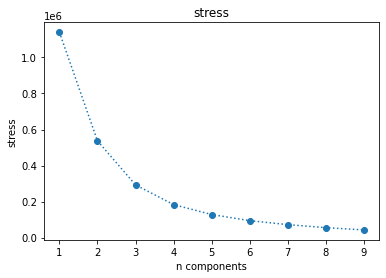

In [31]:
plt.plot(range(1, 10), stress,"o:")
plt.xticks(range(1, 10))
plt.title('stress')
plt.ylabel('stress')
plt.xlabel('n components')
plt.show()

let's start modeling and make a 3dplots

In [32]:
mds = MDS(n_components=3, random_state=0)

In [33]:
md = mds.fit_transform(X)

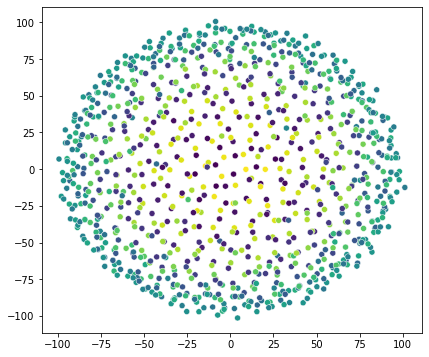

In [34]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1)
ax = sns.scatterplot(x=md[:, 0], y=md[:, 1],c=md[:,2])

plt.show()


Text(0.5, 0.92, 'Original Points')

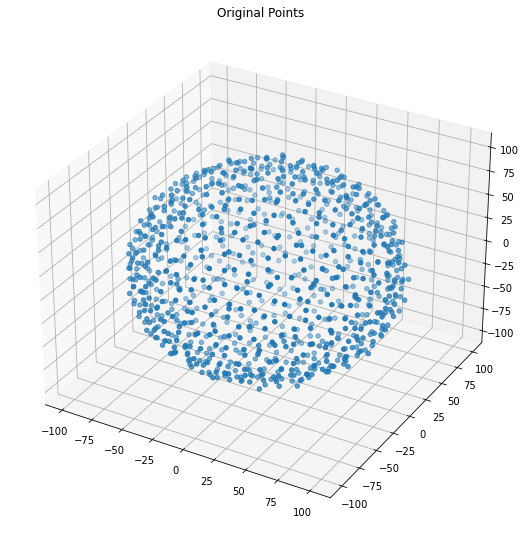

In [35]:

fig = plt.figure(2, (20,14))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(md[:,0], md[:,1], zs=md[:,2],s=20)
plt.title('Original Points')


In [36]:

fig = plt.figure(figsize = (15,15))
trace = go.Scatter3d(x=md[:, 0], y=md[:, 1], z=md[:, 2], mode='markers',marker=dict( size= 3, line=dict(color= 'black',width = 3)))
layout = go.Layout(margin=dict(l=0,r=0),height = 500,width = 500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<Figure size 1080x1080 with 0 Axes>

As you can see in the 3d plots. the results are like a sphere. I think it means that the distance of the distance matrix from the center is the same. you can see it, especially when you rotate it in the last plot. \
Because we can not see any special categories, maybe it means that there is no difference between the distance matrix. it was predictable because the random samples were extracted from poison distribution so the distance of samples from the center follows the slow rate.